# Import the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
     
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset

In [2]:
# Importing the dataset
df = pd.read_csv('iris.data')

# Set columns

In [3]:
df.columns=["sepal_length","sepal_width","petal_length","petal_width","target"]

# EDA

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.shape

(149, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   target        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
target           3
dtype: int64

In [9]:
df.target.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: target, dtype: int64

# Visualization

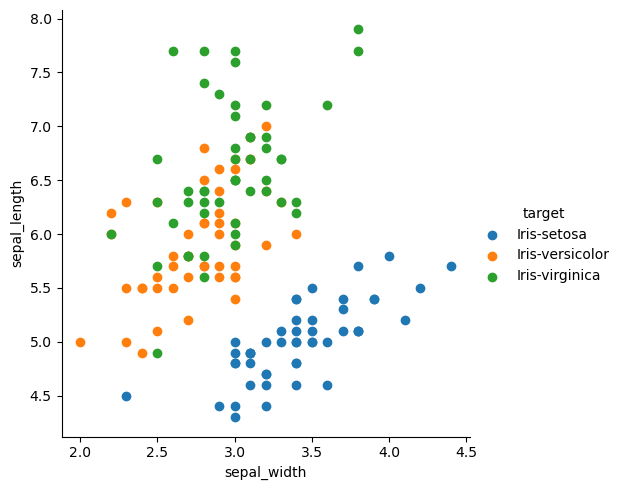

In [10]:
sns.FacetGrid(df,hue='target',height=5).map(plt.scatter,"sepal_width","sepal_length").add_legend()

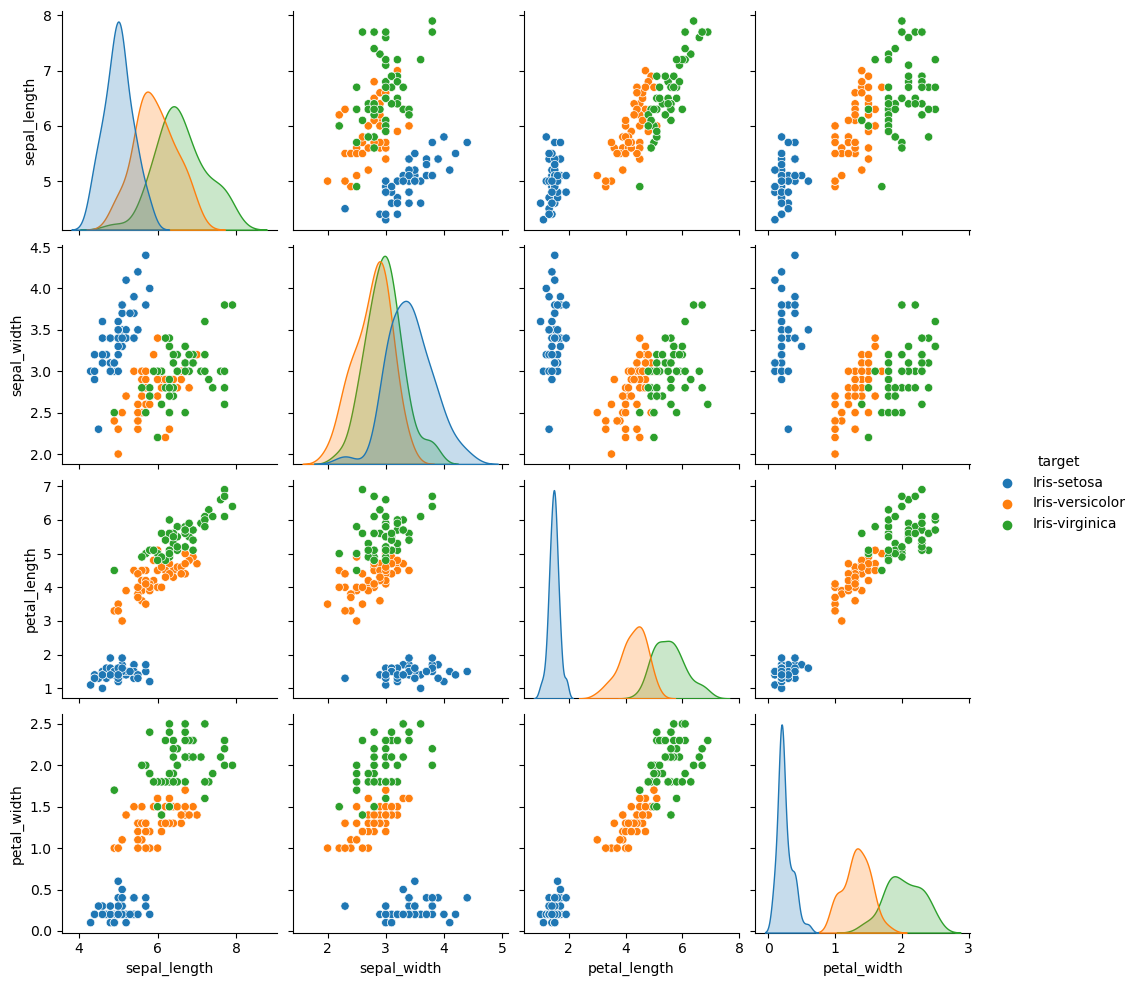

In [11]:
sns.pairplot(df,hue="target")

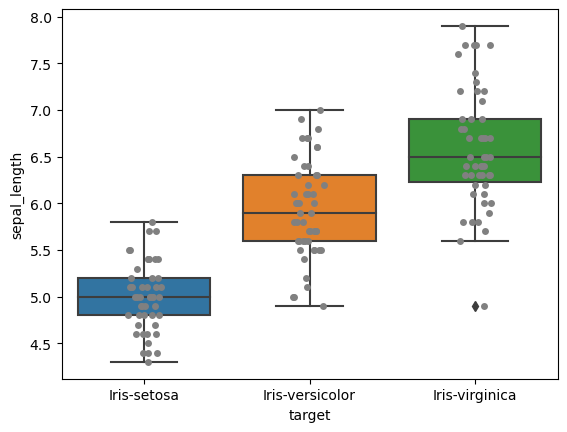

In [12]:
ax=sns.boxplot(x='target',y='sepal_length',data=df)
ax=sns.stripplot(x='target',y='sepal_length',data=df,jitter=True,edgecolor='gray',color="gray")

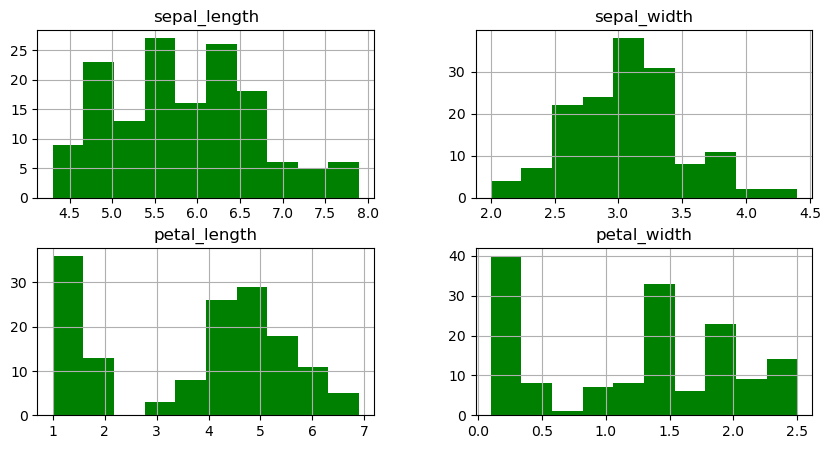

In [13]:
df.hist(color="green")
fig=plt.gcf()
fig.set_size_inches(10,5)

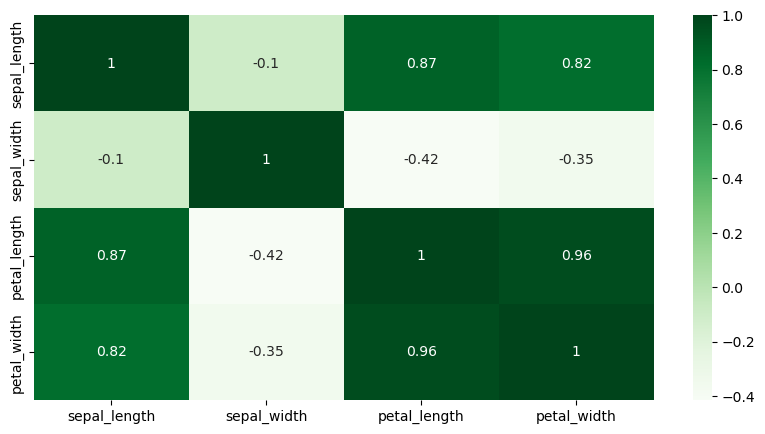

In [14]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,5)
fig=sns.heatmap(df.corr(), annot=True, cmap='Greens')

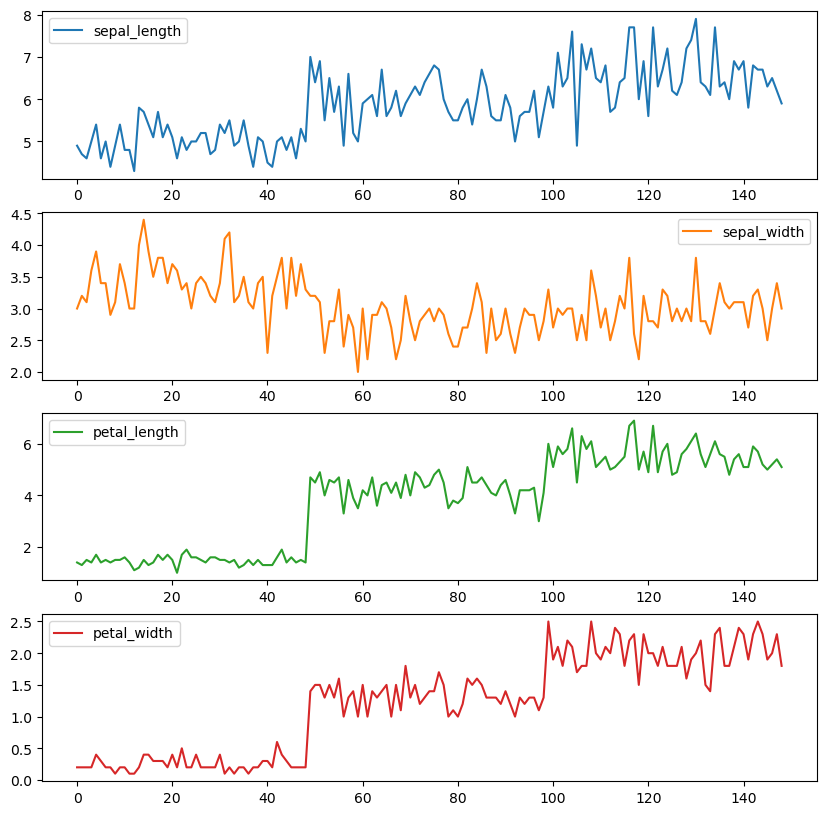

In [15]:
df.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

# Split the dataset

In [16]:
X = df.drop(columns="target")
y = df.target

# Split the dataset into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

print("Y_train.shape:", y_train.shape)
print("Y_test.shape:", y_test.shape)

X_train.shape: (119, 4)
X_test.shape: (30, 4)
Y_train.shape: (119,)
Y_test.shape: (30,)


# Create a K-Nearest Neighbors classifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test set

In [20]:
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


# Confusion Matrix

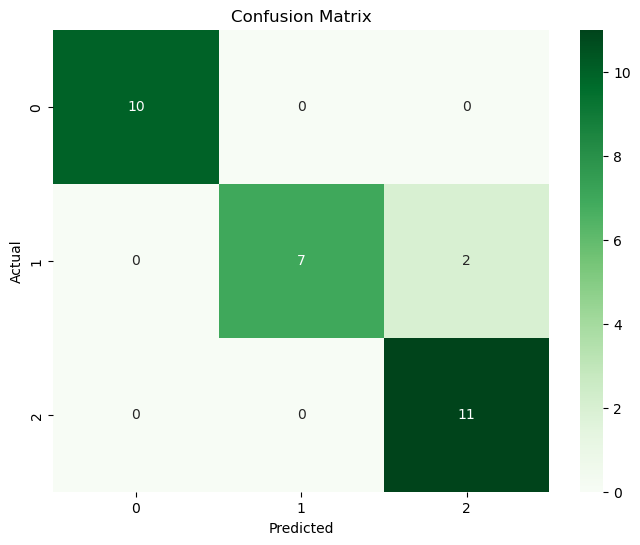

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix')
plt.show()

# Classification Report

In [23]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

